<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [2]:
import scannerpy 
from scannertools import face_detection
from esper.prelude import load_frame

In [2]:
#from query.models import Video

In [3]:
# video = Video(
    
# )

In [3]:
db = scannerpy.Database()

Exception ignored in: 'grpc._cython.cygrpc._next'
KeyboardInterrupt
Process Process-1:


SystemExit: 0

Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/root/.local/lib/python3.5/site-packages/scannerpy/database.py", line 330, in heartbeat_task
    rpc_types.Empty(), timeout=self._grpc_timeout)
  File "/root/.local/lib/python3.5/site-packages/grpc/_channel.py", line 499, in __call__
    state, call, = self._blocking(request, timeout, metadata, credentials)
  File "/root/.local/lib/python3.5/site-packages/grpc/_channel.py", line 494, in _blocking
    event = call.next_event()
  File "src/python/grpcio/grpc/_cython/_cygrpc/channel.pyx.pxi", line 304, in grpc._cython.cygrpc.SegregatedCall.next_e

In [1]:
from scannertools import Video as STVideo
hists = face_detection.detect_faces(
    db, videos=[STVideo("movies/2010_the_year_we_make_contact_1984.mkv")], frames=[[0, 100, 1000]])

NameError: name 'face_detection' is not defined

In [16]:
list(hists[0].load())

[[x1: 0.2716503143310547
  y1: 0.1395236998796463
  x2: 0.6845738887786865
  y2: 0.7598625421524048
  score: 0.9999964237213135], [], []]

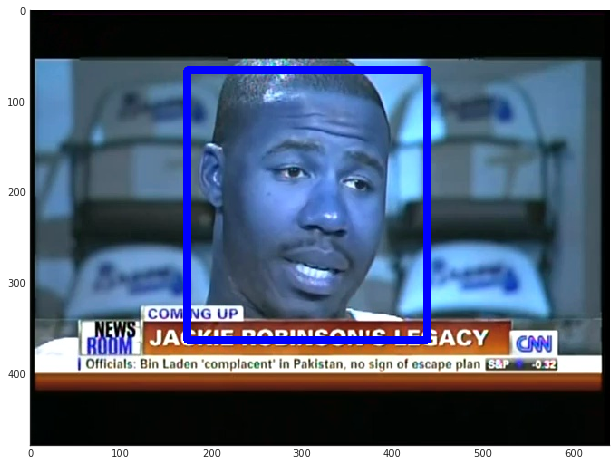

In [18]:
import matplotlib.pyplot as plt
plt.imshow(load_frame(video, 0, [{'bbox_x1': bbox.x1, 'bbox_x2': bbox.x2, 'bbox_y1': bbox.y1, 'bbox_y2': bbox.y2} 
                                 for bbox in next(hists[0].load())]))